# XGBoost

In [2]:
import  os
import  numpy as np
import  pandas as pd
import  matplotlib.pyplot as plt
import  seaborn as sns
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
df = pd.read_csv('../data_preprocessing/Merged_data/002_verwaltung_hourly_with_holidays_indoor_person_counts.csv')

In [4]:
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M:%S')

In [5]:
df.set_index('DateTime',inplace=True)


In [6]:
df = df.astype({'is_holiday': 'int32', 'day_of_week': 'int32', 'hour_of_day': 'int32', 'is_working_hour': 'int32'})

In [7]:
# Define the date ranges for training and test data
train_end_date = df.index.min() + pd.DateOffset(months=9)
test_start_date = train_end_date

# Split the DataFrame
train_data = df[:train_end_date]
test_data = df[test_start_date:]

# Task 1: Predict the heating energy consumption for the next 15 minutes

## Using only weather data as features

In [8]:

# Prepare the data
input_cols = [ 'Temperature',
       'Humidity', 'Dewpoint', 'Sun Duration', 'Precipitation Height',
       'Wind Speed', 'Wind Direction']
target_col = 'heating_hourly_diff'

# Assuming train_data and test_data are already loaded DataFrames
X_train = train_data[input_cols]
y_train = train_data[target_col]
X_test = test_data[input_cols]
y_test = test_data[target_col]

# Initialize the model
model = XGBRegressor(n_estimators=200, random_state=42, objective='reg:squarederror')

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R² Score: {r2:.4f}')

MSE: 55.1021
RMSE: 7.4231
MAE: 6.0039
R² Score: 0.2184


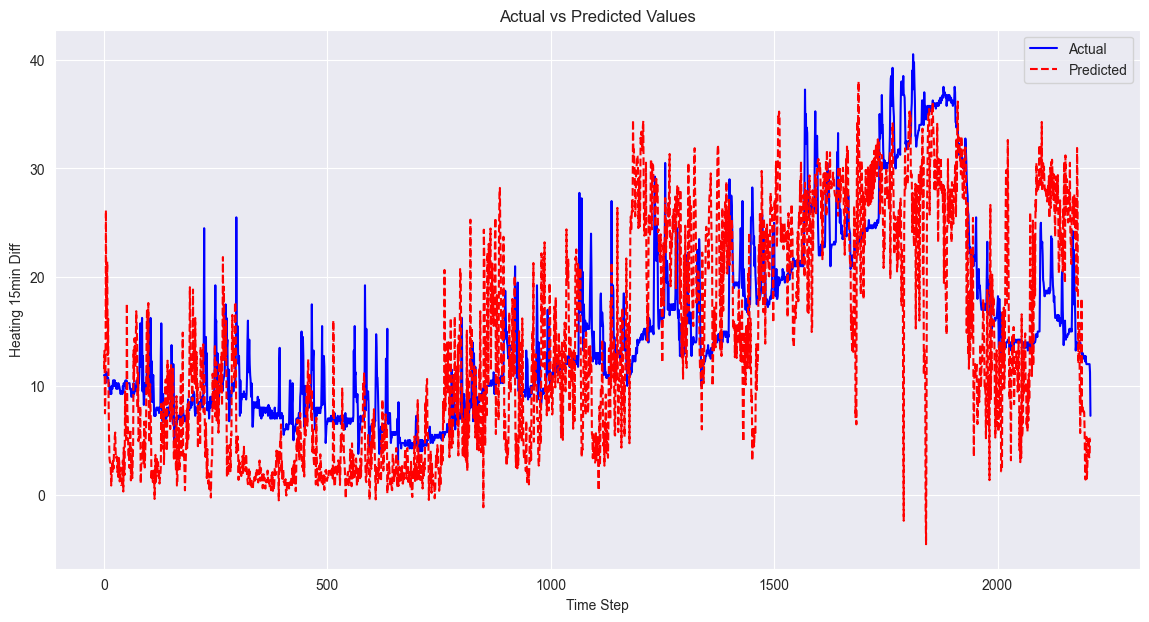

In [9]:

# Assuming `y_test` and `y_pred` are your actual and predicted values respectively

# Convert to numpy arrays if they are not already
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Plot the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual', color='b')
plt.plot(y_pred, label='Predicted', color='r', linestyle='--')
plt.xlabel('Time Step')
plt.ylabel('Heating 15min Diff')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# Using holidays as a feature

In [10]:
# Prepare the data
input_cols = [ 'is_holiday',
       'day_of_week', 'hour_of_day', 'is_working_hour', 'Temperature',
       'Humidity', 'Dewpoint', 'Sun Duration', 'Precipitation Height',
       'Wind Speed', 'Wind Direction']
target_col = 'heating_hourly_diff'

# Assuming train_data and test_data are already loaded DataFrames
X_train = train_data[input_cols]
y_train = train_data[target_col]
X_test = test_data[input_cols]
y_test = test_data[target_col]

# Initialize the model
model = XGBRegressor(n_estimators=200, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R² Score: {r2:.4f}')

MSE: 46.0340
RMSE: 6.7848
MAE: 5.4303
R² Score: 0.3471


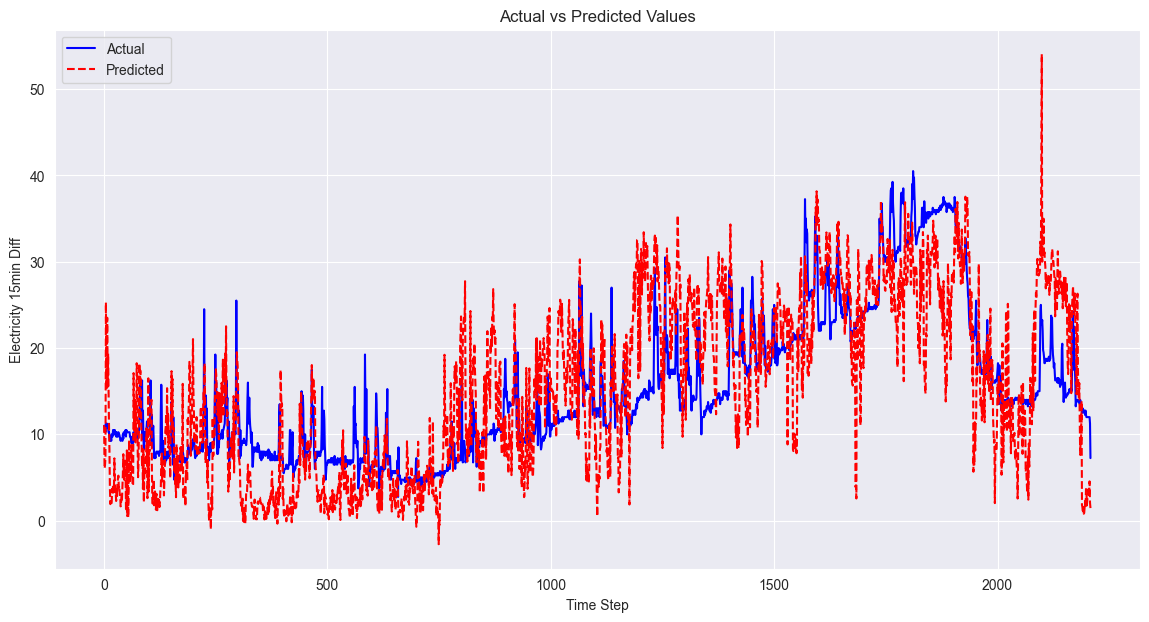

In [11]:

# Assuming `y_test` and `y_pred` are your actual and predicted values respectively

# Convert to numpy arrays if they are not already
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Plot the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual', color='b')
plt.plot(y_pred, label='Predicted', color='r', linestyle='--')
plt.xlabel('Time Step')
plt.ylabel('Electricity 15min Diff')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

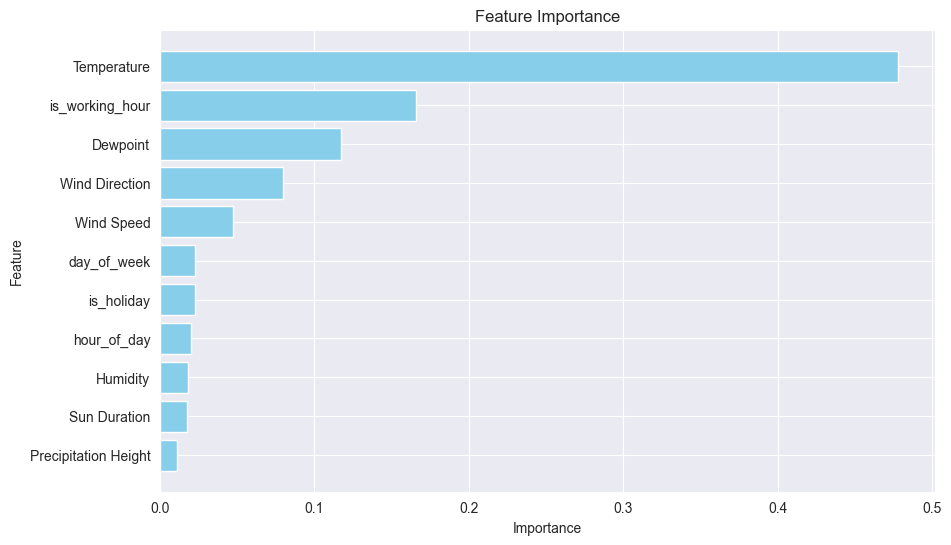

In [12]:

feature_importances = model.feature_importances_
features = input_cols

# Create a DataFrame for better visualization
df_feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
df_feature_importances = df_feature_importances.sort_values(by='Importance', ascending=True)

# Plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.barh(df_feature_importances['Feature'], df_feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.grid(True)
plt.show()

## Using indoors features


In [13]:
# Prepare the data
input_cols = [  'is_holiday',
       'day_of_week', 'hour_of_day', 'is_working_hour', 'number_of_people',
       'Temperature', 'Humidity', 'Dewpoint', 'Sun Duration',
       'Precipitation Height', 'Wind Speed', 'Wind Direction',
       'indoor_temperature', 'temperature_difference']
target_col = 'heating_hourly_diff'

# Assuming train_data and test_data are already loaded DataFrames
X_train = train_data[input_cols]
y_train = train_data[target_col]
X_test = test_data[input_cols]
y_test = test_data[target_col]

# Initialize the model
model = XGBRegressor(n_estimators=200, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R² Score: {r2:.4f}')

MSE: 44.5420
RMSE: 6.6740
MAE: 5.4139
R² Score: 0.3682


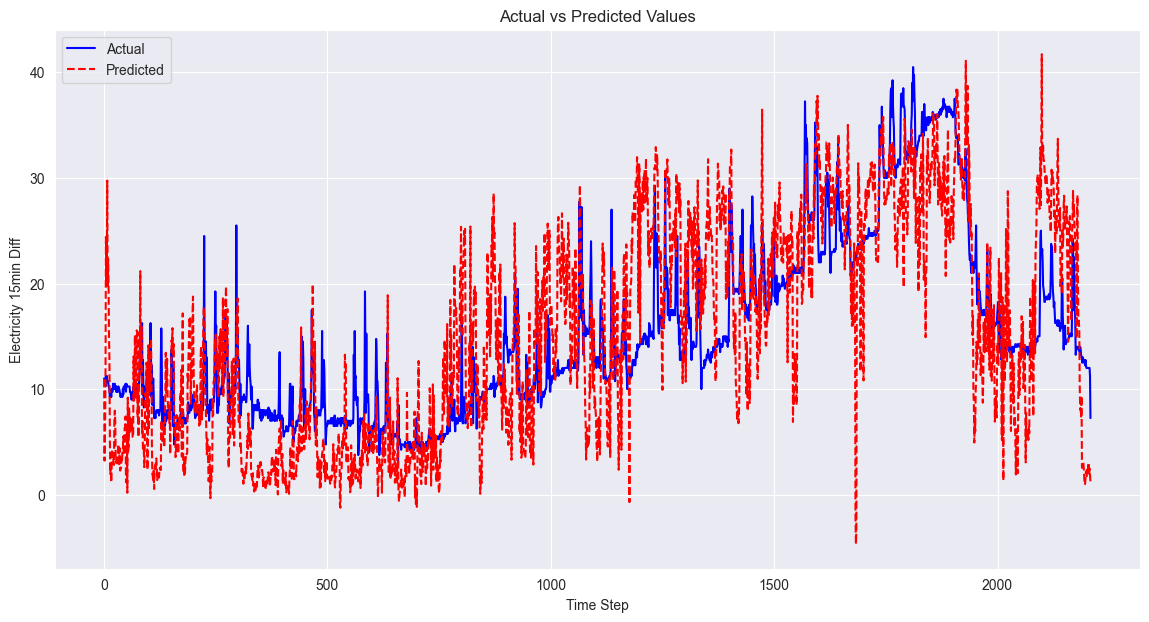

In [14]:

# Assuming `y_test` and `y_pred` are your actual and predicted values respectively

# Convert to numpy arrays if they are not already
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Plot the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual', color='b')
plt.plot(y_pred, label='Predicted', color='r', linestyle='--')
plt.xlabel('Time Step')
plt.ylabel('Electricity 15min Diff')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# Task 2: Predict the electricity consumption for the next 15 minutes

## Using only weather data as features

In [15]:

# Prepare the data
input_cols = [ 'Temperature',
       'Humidity', 'Dewpoint', 'Sun Duration', 'Precipitation Height',
       'Wind Speed', 'Wind Direction']
target_col = 'electricity_hourly_diff'

# Assuming train_data and test_data are already loaded DataFrames
X_train = train_data[input_cols]
y_train = train_data[target_col]
X_test = test_data[input_cols]
y_test = test_data[target_col]

# Initialize the model
model = XGBRegressor(n_estimators=200, random_state=42, objective='reg:squarederror')

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R² Score: {r2:.4f}')

MSE: 18.8743
RMSE: 4.3445
MAE: 3.0705
R² Score: -0.2595


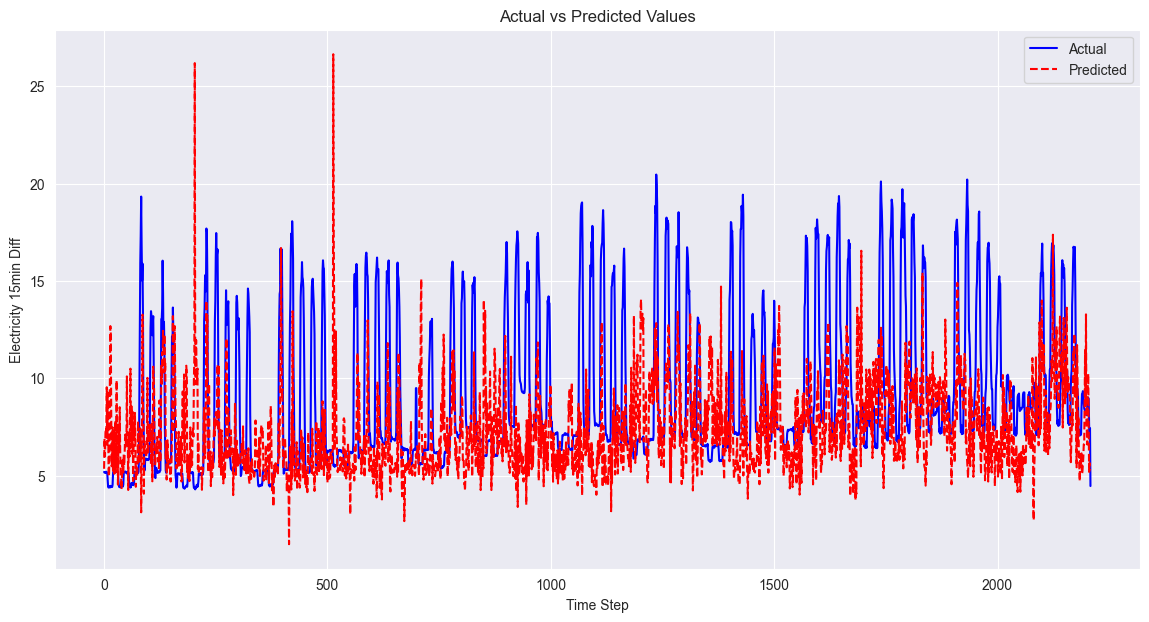

In [16]:

# Assuming `y_test` and `y_pred` are your actual and predicted values respectively

# Convert to numpy arrays if they are not already
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Plot the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual', color='b')
plt.plot(y_pred, label='Predicted', color='r', linestyle='--')
plt.xlabel('Time Step')
plt.ylabel('Electricity 15min Diff')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

## Using holidays as a feature

In [18]:
# Prepare the data
input_cols = [ 'is_holiday',
       'day_of_week', 'hour_of_day', 'is_working_hour', 'Temperature',
       'Humidity', 'Dewpoint', 'Sun Duration', 'Precipitation Height',
       'Wind Speed', 'Wind Direction']
target_col = 'electricity_hourly_diff'

# Assuming train_data and test_data are already loaded DataFrames
X_train = train_data[input_cols]
y_train = train_data[target_col]
X_test = test_data[input_cols]
y_test = test_data[target_col]

# Initialize the model
model = XGBRegressor(n_estimators=200, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R² Score: {r2:.4f}')

MSE: 11.3999
RMSE: 3.3764
MAE: 1.7636
R² Score: 0.2393


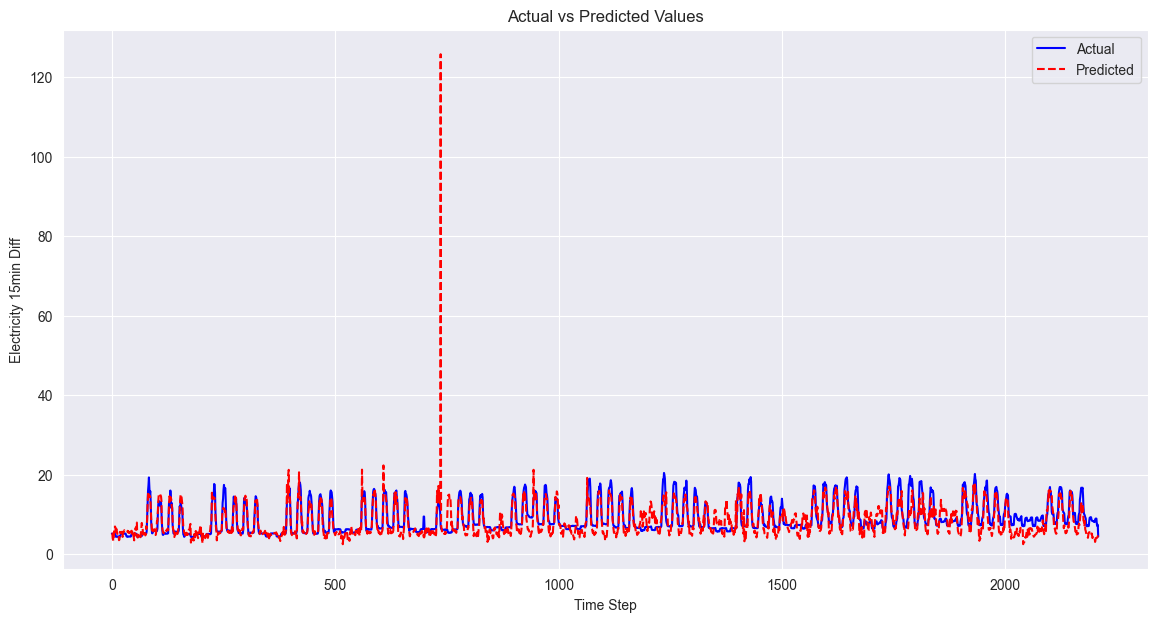

In [19]:

# Assuming `y_test` and `y_pred` are your actual and predicted values respectively

# Convert to numpy arrays if they are not already
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Plot the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual', color='b')
plt.plot(y_pred, label='Predicted', color='r', linestyle='--')
plt.xlabel('Time Step')
plt.ylabel('Electricity 15min Diff')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

## Using indoors features

In [20]:
# Prepare the data
input_cols = [  'is_holiday',
       'day_of_week', 'hour_of_day', 'is_working_hour', 'number_of_people',
       'Temperature', 'Humidity', 'Dewpoint', 'Sun Duration',
       'Precipitation Height', 'Wind Speed', 'Wind Direction',
       'indoor_temperature', 'temperature_difference']
target_col = 'electricity_hourly_diff'

# Assuming train_data and test_data are already loaded DataFrames
X_train = train_data[input_cols]
y_train = train_data[target_col]
X_test = test_data[input_cols]
y_test = test_data[target_col]

# Initialize the model
model = XGBRegressor(n_estimators=200, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R² Score: {r2:.4f}')

MSE: 12.0307
RMSE: 3.4685
MAE: 1.7674
R² Score: 0.1972


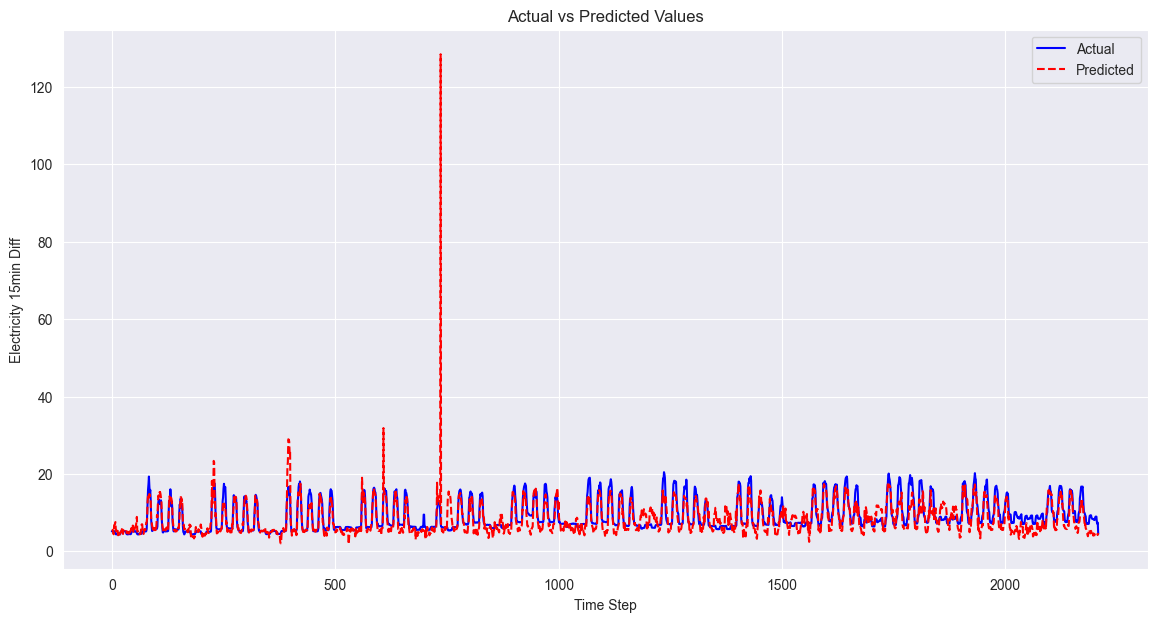

In [21]:
# Assuming `y_test` and `y_pred` are your actual and predicted values respectively

# Convert to numpy arrays if they are not already
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Plot the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual', color='b')
plt.plot(y_pred, label='Predicted', color='r', linestyle='--')
plt.xlabel('Time Step')
plt.ylabel('Electricity 15min Diff')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()